# Chapter 5.1. Evaluation of Consistent Subgenres

In [1]:
import sys
import os
import glob
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features, st_tests, process_labels
import pandas as pd
import re
import numpy as np

# 5.1.0. Getting Data

Obtaining data

In [27]:
outdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/chap5_1/"

In [3]:
reference_labels = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/reading_robot/data/tokens-labels_semantic-labels.csv", sep="\t",index_col=False)
reference_labels.shape

(276, 4)

In [4]:
reference_labels.head()

,label,lexical_label_reference,semantic_label_reference,thema_code
0,almacenamiento de datos externo,almacenamiento,almacenamiento,-
1,novela americana,americana,americana,-
2,del caribe y américa latina,hispanoamericana,americana,-
3,hispanoamericana,hispanoamericana,americana,-
4,animales ficticios,animales,animales,-


In [5]:
sources_genre = ['subgenre.cligs', 'genre.subtitle', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', 'subgenre.edit.amazon', 'subgenre.edit.wikidata', 'subgenre.edit.esdbpedia', 'subgenre.subtitle.bne']

In [152]:
metadata = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/", metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",").fillna("")
metadata.shape

metadata and class shape: 	 (358, 173)


(358, 173)

In [153]:
metadata[sources_genre] = process_labels.delete_specific_label(metadata[sources_genre], "novela")
metadata[sources_genre] = process_labels.delete_specific_label(metadata[sources_genre], "novel")

In [154]:
metadata.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,3.69129e+07,XX842743,...,121,13,483,200,312,177,518,41371,655,1900
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,239,39,821,314,336,355,684,70169,764,1880
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,253,17,725,396,301,327,498,54401,572,1890
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,288,24,1061,424,282,248,450,60648,553,1890
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,7.1396e+07,XX1014802,...,191,17,705,456,174,229,415,43359,446,1890


# 5.1.2. Data and Sources

In [14]:
metadata.shape

(358, 173)

Columns with information about genre in the corpus

In [15]:
print([column for column in metadata.columns.tolist() if "genre" in column ])

['supergenre', 'genre', 'subgenre.cligs.important', 'subgenre.cligs', 'genre.subtitle', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', 'subgenre.edit.amazon', 'subgenre.edit.wikidata', 'subgenre.edit.esdbpedia', 'subgenre.subtitle.bne']


Amount of columns that are sources of labels

In [16]:
len(sources_genre)

9

Most frequent lable in the subtitle source

In [17]:
Counter(metadata['genre.subtitle'].tolist()).most_common(10)

[('', 276),
 ('episodio nacional', 10),
 ('historia', 9),
 ('memorias', 7),
 ('novela de costumbres', 6),
 ('memoria', 5),
 ('novela grande', 3),
 ('cuento', 2),
 ('figuras', 2),
 ('libro', 2)]

In [18]:
metadata.loc["ne0311"]['genre.subtitle']

'novela de costumbres'

Most  frequent label in the BNE column

In [19]:
Counter(metadata['subgenre.subtitle.bne'].tolist()).most_common(20)

[('', 261),
 ('episodio nacional', 10),
 ('historia', 9),
 ('memorias', 7),
 ('novela de costumbres', 5),
 ('memoria', 3),
 ('novela grande', 3),
 ('cuento', 2),
 ('figuras', 2),
 ('libro', 2),
 ('greguería', 2),
 (' novela completa', 2),
 ('Novela andaluza', 2),
 (' novela original', 1),
 ('memoria, novela romántica', 1),
 ('memoria, novela satírica', 1),
 ('ensayo de novela', 1),
 ('escenas', 1),
 ('apuntes', 1),
 ('nivola', 1)]

In [20]:
metadata.loc[metadata['subgenre.subtitle.bne'] == 'novela de costumbres, novela histórica']["title.main"]

ne0311    Los majos de Cádiz
Name: title.main, dtype: object

# 5.1.3. Exploration of Sources

Labels "novela" and "novel" are deleted from the possible labels 

In [21]:
metadata = process_labels.delete_specific_label(metadata[sources_genre], "novela")
metadata = process_labels.delete_specific_label(metadata[sources_genre], "novel")


The palette (a set, a group of different elements) of the labels is extracted

In [22]:
palette_labels = process_labels.get_set_labels(outdir, metadata[sources_genre])

In [23]:
metadata.loc[metadata["subgenre.edit.esdbpedia"]!=""]["subgenre.edit.esdbpedia"]

ne0005           realismo
ne0030         Esperpento
ne0077        Naturalismo
ne0079    Novela realista
ne0081    Novela realista
ne0088    Novela realista
ne0135        Naturalista
ne0325    Novela realista
ne0326    Novela realista
Name: subgenre.edit.esdbpedia, dtype: object

Amount of different labels in sources

In [24]:
len(palette_labels)

256

Some example of the palette

In [25]:
print(palette_labels[0:20])

['acción y aventura', 'adventure', 'adventure novel', 'almacenamiento de datos externo', 'alta novela', 'animales ficticios', 'antigua y clásica', 'antigüedad', 'antigüedades y coleccionables', 'antireligous', 'antologías', 'aprendizaje y enseñanza de idiomas', 'apuntes', 'autobiografía', 'autobiographical', 'aventuras', 'bibliotecas', 'bildungsroman', 'biografía', 'biografía sensorial']


Each source is explored about the amount of labels and its cover in the corpus

In [28]:
df_sources_labels = process_labels.create_df_of_sources(metadata[sources_genre], outdir)
df_sources_labels.round(2)

(9, 6)


,different_labels,labeled_texts,ratio,mean-labels-texts,std-labels-texts,most-common-label
subgenre.edit.wikidata,4,5.0,1.25,1.00,0.00,novela naturalista
subgenre.subtitle.bne,57,97.0,1.70,1.07,0.30,episodio nacional
subgenre.edit.esdbpedia,5,9.0,1.80,1.00,0.00,novela realista
genre.subtitle,41,82.0,2.00,1.02,0.22,episodio nacional
subgenre.lithist.MdLE,77,218.0,2.83,1.01,0.14,novela naturalista
subgenre.edit.amazon,77,219.0,2.84,3.21,2.69,ficción clásica
subgenre.lithist.HdLE,33,104.0,3.15,1.00,0.00,novela naturalista
subgenre.edit.epublibre,16,187.0,11.69,1.35,0.53,drama
subgenre.cligs,30,358.0,11.93,3.49,1.37,realist


General tendencies of the sources

In [29]:
df_sources_labels["ratio"].median()

2.831168831168831

In [30]:
df_sources_labels["mean-labels-texts"].mean()

1.5721558076470978

In [31]:
df_sources_labels["std-labels-texts"].mean()

0.5823651651738538

In [32]:
df_sources_labels.loc["subgenre.edit.amazon"]["mean-labels-texts"] + df_sources_labels.loc["subgenre.edit.amazon"]["std-labels-texts"]

5.897373979248166

In [33]:
df_sources_labels.loc["subgenre.cligs"]["mean-labels-texts"] + df_sources_labels.loc["subgenre.cligs"]["std-labels-texts"]

4.855396338927901

# 5.1.4. Exploration of Labels

How many texts are part of a label in proportion?

In [34]:
round(metadata.shape[0]/len(palette_labels),2)

1.4

How many labels are in total?

In [35]:
list_labels = process_labels.get_list_labels(outdir, metadata[sources_genre], print_=True)

len(list_labels)

3097

Examples:

In [36]:
print(list_labels[0:20])

['naturalist', 'sentimental', 'social', 'realist', 'naturalist', 'social', 'realist', 'naturalist', 'social', 'spiritual', 'realist', 'sentimental', 'social', 'spiritual', 'realist', 'naturalist', 'realist', 'sentimental', 'social', 'spiritual']


A table for comparing the amount of sources that are using a text and the amount of texts each label is used for is created

In [37]:
df_labels_sources = process_labels.create_df_of_labels(palette_labels, metadata[sources_genre], outdir)

(256, 2)


In [38]:
df_labels_sources.head()

,used_by,used_for
acción y aventura,1,5
novela de tesis,1,6
novela descriptiva,1,1
novela en siete jornadas,1,1
novela epistolar,1,1


How is the correlation between the amount of sources that are using the label and the amount of texs that is used for?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


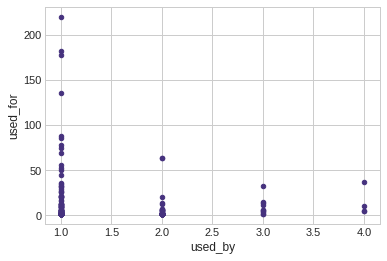

In [39]:
df_labels_sources.plot.scatter("used_by","used_for")

Distribution of the amount of texts a label is used for:

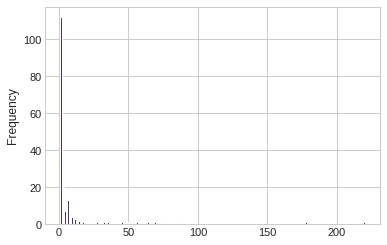

In [40]:
df_labels_sources["used_for"].plot.hist(bins=220)

In [41]:
Counter(df_labels_sources["used_for"]).most_common(5)

[(1, 112), (2, 35), (3, 20), (6, 13), (5, 11)]

Most common label counting the texts

In [42]:
df_labels_sources.sort_values(by="used_for", ascending=False).head(15)

,used_by,used_for
realist,1,220
sentimental,1,182
social,1,178
ficción clásica,1,136
philosophical,1,88
ficción contemporánea,1,86
naturalist,1,78
historical,1,75
literatura y ficción,1,69
bildungsroman,2,64


Least common labels or hapax-labels

In [43]:
df_labels_sources.sort_values(by="used_for", ascending=False).tail(15)

,used_by,used_for
novela cortesanas,1,1
novela de acción,1,1
autobiografía,1,1
novela de costumbres campesinas,1,1
antireligous,1,1
antigüedades y coleccionables,1,1
antigüedad,1,1
almacenamiento de datos externo,1,1
adventure novel,1,1
manifiesto lírico,1,1


Labels that are more common in different sources

In [44]:
df_labels_sources.sort_values(by="used_by", ascending=False)

,used_by,used_for
nivola,4,5
historia,4,37
novela de guerra,4,5
memorias,4,10
biografía,3,2
novela humorística,3,6
novela fantástica,3,5
novela naturalista,3,33
novela realista,3,15
novela histórica,3,14


Distribution of amount of sources that are using a label

for of data is good


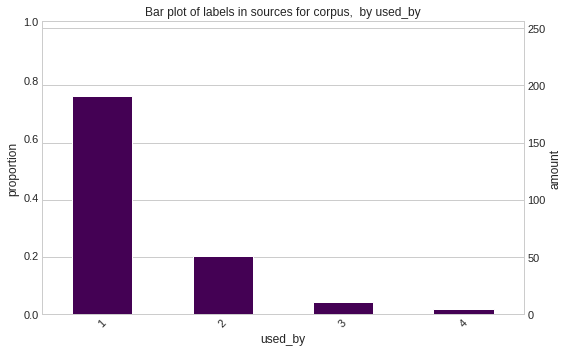

In [45]:
describe_data.grouped_bars(wdir = outdir, metadata = df_labels_sources, class_ = "used_by", dataset = "labels in sources for corpus, ", figsize = (8,5))

In [46]:
Counter(df_labels_sources["used_by"]).most_common()

[(1, 191), (2, 51), (3, 10), (4, 4)]

Proportion of the most frequent case and the second most frequent case

In [47]:
round(Counter(df_labels_sources["used_by"]).most_common(1)[0][1]/df_labels_sources.shape[0],2)*100

75.0

In [48]:
round(Counter(df_labels_sources["used_by"]).most_common(2)[1][1]/df_labels_sources.shape[0],2)*100


20.0

# 5.1.5. Semantic Mapping of Labels, Description and Standardization trough Thema

Semantic references to the token labels

In [49]:
reference_labels[["label","lexical_label_reference","semantic_label_reference","thema_code"]].sample(10)

,label,lexical_label_reference,semantic_label_reference,thema_code
220,psicological,psicológica,psicológica,-
78,novela erótica,erótica,erótica,FP
74,manifiesto lírico,manifiesto,ensayo,DNL
137,novela arqueológica,arqueológica,histórica,FV
265,novela suelta,suelta,suelta,-
164,infantil,escuela,juvenil-infantil,YFB
113,philosophical,filosófica,filosófica,QD
50,crónica novelada,crónica,crónica,DNP
165,juvenil,infantil,juvenil-infantil,YFB
43,novela de costumbres marítimas,costumbrista,costumbrista,-


Testing different specific semantic labels

In [50]:
reference_labels.loc[(reference_labels["semantic_label_reference"] == "terror") & (reference_labels["thema_code"] != "-")].shape[0]

1

In [51]:
reference_labels.loc[(reference_labels["semantic_label_reference"] == "larga") & (reference_labels["thema_code"] != "-")].shape[0]

0

A list of all the different semantic labels is created

In [52]:
palette_semantic_labels = process_labels.get_set_labels(outdir, reference_labels[["semantic_label_reference"]])

In [53]:
len(palette_semantic_labels)

110

Proportion of the semantic palette in comparison to the original palette

In [54]:
round(100-((len(palette_semantic_labels) /len(palette_labels))*100),2)

57.03

Proportion of the semantic palette in comparison to the size of the corpus

In [55]:
round(metadata.shape[0]/len(palette_semantic_labels),2)

3.25

The labels in the metadata are mapped to their semantic references

In [56]:
semantic_labels = process_labels.modelize_metadata_labels(metadata[sources_genre], outdir, reference_labels, reference_column = "semantic_label_reference")

In [57]:
semantic_labels.head()

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne
ne0001,"naturalista,sentimental,social,realista",,,,"aventura,drama","ficción, literatura;ficción, literatura;litera...",,,
ne0002,"naturalista,social,realista",,de tesis,,realista,"ficción, literatura,biblioteca,juvenil-infanti...",,,
ne0003,"naturalista,social,espiritual,realista",,espiritual,,drama,"ficción,europea,antología;ficción, literatura;...",,,
ne0004,"sentimental,social,espiritual,realista",,espiritual,,"drama,realista","siglo-xix,clásico;ficción, literatura;antología;",,,
ne0005,"naturalista,realista,sentimental,social,espiri...",,espiritual,,realista,"ficción, literatura,ficción, literatura;ficció...",,realista,


List of all the semantic labels assigned to some text

In [58]:
list_semantic_labels = process_labels.get_list_labels(outdir, semantic_labels, print_=True)

In [59]:
len(list_semantic_labels)

3522

Table comparing the amount of sources that using and the amount of text each semantic label is used for

In [60]:
df_semantic_labels_sources = process_labels.create_df_of_labels(palette_semantic_labels,semantic_labels, outdir, reference_labels)
df_semantic_labels_sources = df_semantic_labels_sources.loc[df_semantic_labels_sources["used_by"]>0]

(110, 3)


In [61]:
print(Counter(df_semantic_labels_sources["used_by"]).most_common())

[(1, 50), (2, 24), (3, 13), (4, 9), (5, 7), (6, 3), (7, 3)]


In [62]:
round((1-(Counter(df_semantic_labels_sources["used_by"]).most_common(1)[0][1] / len(palette_semantic_labels)))*100,2)

54.55

for of data is good


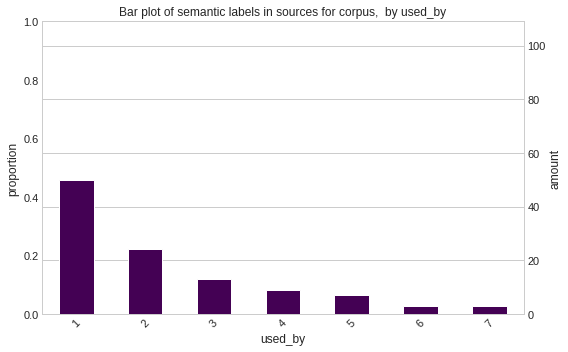

In [63]:
describe_data.grouped_bars(wdir = outdir, metadata = df_semantic_labels_sources, class_ = "used_by", dataset = "semantic labels in sources for corpus, ", figsize = (8,5))


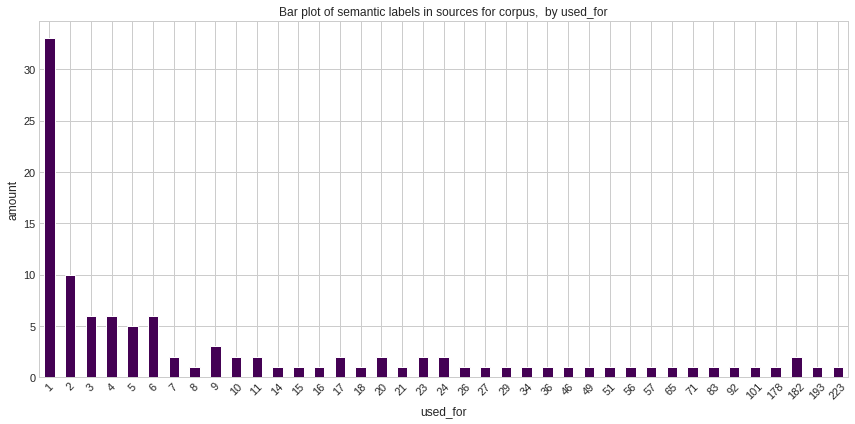

In [64]:
describe_data.grouped_bars(wdir = outdir, metadata = df_semantic_labels_sources, class_ = "used_for", dataset = "semantic labels in sources for corpus, ")


Frequency of the labels by sources and texts

In [65]:
df_semantic_labels_sources.sort_values(by="used_by", ascending=False).head(10)

,used_by,used_for,is_in_thema
humor,7,51,1
realista,7,223,0
guerra,7,18,1
aventura,6,49,1
histórica,6,101,1
fantástico,6,24,1
romántica,5,21,1
diálogo,5,9,0
memorias,5,57,1
espiritual,5,34,1


In [66]:
df_semantic_labels_sources.sort_values(by="used_for", ascending=False).head(10)

,used_by,used_for,is_in_thema
realista,7,223,0
literatura,1,193,1
social,4,182,1
sentimental,2,182,0
ficción,1,178,1
histórica,6,101,1
filosófica,5,92,1
naturalista,5,83,0
educación,3,71,1
drama,3,65,0


Do the frequency in the sources and for the texts correlate with each other?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


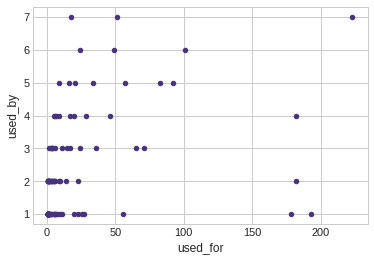

In [67]:
df_semantic_labels_sources.plot.scatter("used_for","used_by")

In [68]:
st_tests.calculate_regression(df_semantic_labels_sources, "used_for","used_by")

(109, 3)
(109, 3)


LinregressResult(slope=0.014029849966517632, intercept=1.9725866245535761, rvalue=0.37365490604458657, pvalue=6.279418954449068e-05, stderr=0.0033669456801927)

Yes, they do, p-value < 0.001

Reference of tokens labels and semantic labels that contain several semantic references

In [69]:
reference_labels.loc[reference_labels["semantic_label_reference"].str.contains(",")][["label","lexical_label_reference","semantic_label_reference","thema_code"]]

,label,lexical_label_reference,semantic_label_reference,thema_code
22,biografías y autobiografías,biografía,"biografía,autobiografía","DNB,DNBA"
65,drama rural,drama,"drama, regionalista",-
102,fantasía y terror,fantástico,"fantástico, terror",FMT
108,ficción clásica,ficción,"ficción, literatura",FBC
109,ficción contemporánea,ficción,"ficción, literatura",FBA
110,novelas y ficción literaria,ficción,"ficción, literatura",FB
161,misterio y detectives,suspense,"intriga, policíaca",FH
209,poesía humorística,"poética, humor","poética, humor","DC, FU"
236,cristiana,cristiano,"religiosa, espiritual",FW
237,ficción religiosa y espiritual,cristiano,"religiosa, espiritual",FW


How many of the semantic sources are in Thema?

In [70]:
Counter(df_semantic_labels_sources["is_in_thema"]).most_common()

[(1, 61), (0, 48)]

In [71]:
round(((Counter(df_semantic_labels_sources["is_in_thema"]).most_common()[0][1] / df_semantic_labels_sources.shape[0])*100), 1)

56.0

Does the frequency of the labels have something to do with whether they are in Thema or not?

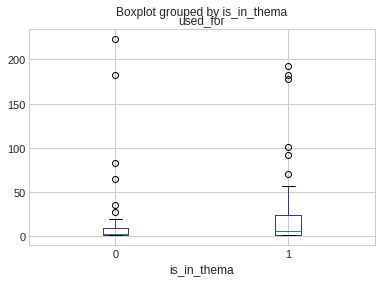

In [72]:
df_semantic_labels_sources.boxplot(["used_for"], by="is_in_thema")

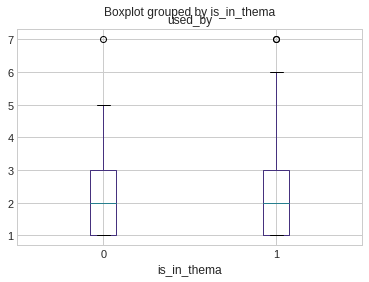

In [73]:
df_semantic_labels_sources.boxplot(["used_by"], by="is_in_thema")

Aparently it does not.

# 5.1.6. Analysis of Inter-Source Agreement

Inter source agreement using the token labels and calculating it for all the labels, visualized as graph

In [74]:
df_edges_token_labels = process_labels.make_edges_df_from_labels(metadata[sources_genre], sources_genre, outdir, "token-labels", kind = "kappa", threshold = 0.05)

subgenre.cligs genre.subtitle
subgenre.cligs subgenre.lithist.MdLE
subgenre.cligs subgenre.lithist.HdLE
subgenre.cligs subgenre.edit.epublibre
subgenre.cligs subgenre.edit.amazon
subgenre.cligs subgenre.edit.wikidata
subgenre.cligs subgenre.edit.esdbpedia
subgenre.cligs subgenre.subtitle.bne
genre.subtitle subgenre.lithist.MdLE
genre.subtitle subgenre.lithist.HdLE
genre.subtitle subgenre.edit.epublibre
genre.subtitle subgenre.edit.amazon
genre.subtitle subgenre.edit.wikidata
genre.subtitle subgenre.edit.esdbpedia
genre.subtitle subgenre.subtitle.bne
subgenre.lithist.MdLE subgenre.lithist.HdLE
subgenre.lithist.MdLE subgenre.edit.epublibre
subgenre.lithist.MdLE subgenre.edit.amazon
subgenre.lithist.MdLE subgenre.edit.wikidata
subgenre.lithist.MdLE subgenre.edit.esdbpedia
subgenre.lithist.MdLE subgenre.subtitle.bne
subgenre.lithist.HdLE subgenre.edit.epublibre
subgenre.lithist.HdLE subgenre.edit.amazon
subgenre.lithist.HdLE subgenre.edit.wikidata
subgenre.lithist.HdLE subgenre.edit.esdbpe

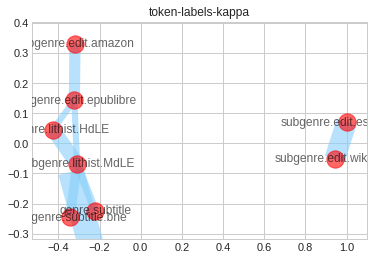

In [75]:
process_labels.make_network(df_edges_token_labels, outdir, "token-labels-kappa", multiple_value_edges_by = 100)

Inter source agreement using semantic labels, calculating it for all labels

In [76]:
df_edges_semantic_labels = process_labels.make_edges_df_from_labels(semantic_labels, sources_genre, outdir, "semantic-labels", kind = "kappa", threshold = 0.05)


subgenre.cligs genre.subtitle
subgenre.cligs subgenre.lithist.MdLE
subgenre.cligs subgenre.lithist.HdLE
subgenre.cligs subgenre.edit.epublibre
subgenre.cligs subgenre.edit.amazon
subgenre.cligs subgenre.edit.wikidata
subgenre.cligs subgenre.edit.esdbpedia
subgenre.cligs subgenre.subtitle.bne
genre.subtitle subgenre.lithist.MdLE
genre.subtitle subgenre.lithist.HdLE
genre.subtitle subgenre.edit.epublibre
genre.subtitle subgenre.edit.amazon
genre.subtitle subgenre.edit.wikidata
genre.subtitle subgenre.edit.esdbpedia
genre.subtitle subgenre.subtitle.bne
subgenre.lithist.MdLE subgenre.lithist.HdLE
subgenre.lithist.MdLE subgenre.edit.epublibre
subgenre.lithist.MdLE subgenre.edit.amazon
subgenre.lithist.MdLE subgenre.edit.wikidata
subgenre.lithist.MdLE subgenre.edit.esdbpedia
subgenre.lithist.MdLE subgenre.subtitle.bne
subgenre.lithist.HdLE subgenre.edit.epublibre
subgenre.lithist.HdLE subgenre.edit.amazon
subgenre.lithist.HdLE subgenre.edit.wikidata
subgenre.lithist.HdLE subgenre.edit.esdbpe

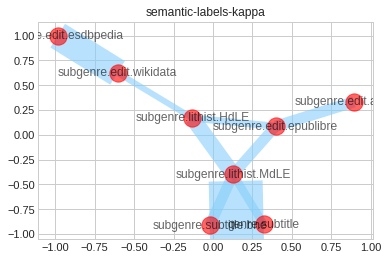

In [77]:
process_labels.make_network(df_edges_semantic_labels, outdir, "semantic-labels-kappa", multiple_value_edges_by = 100)

Inter source agreement of semantic labels, calculating it for EACH label

In [78]:
df_edges_semantic_labels_mean_kappa =  process_labels.make_edges_df_from_each_label(semantic_labels, palette_semantic_labels, sources_genre, outdir, "semantic-labels", kind = "kappa", threshold = 0.00)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:373: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


subgenre.cligs genre.subtitle [0.19595733 0.19187359 0.04249629 0.26498768 0.00350797] 0.13976457046947782
subgenre.cligs subgenre.lithist.MdLE [0.16905222 0.32854741 0.15196793 0.66542056 0.70906136 0.80781619
 0.20305295 0.2357685  0.01704223 0.27530364 0.23550217 0.18358039
 0.13984505 0.13652975 0.42403323 0.11292035 0.02827    0.01621174
 0.06969053 0.08475799 0.56728445] 0.2648408871799384
subgenre.cligs subgenre.lithist.HdLE [0.04888417 0.35776525 0.14677844 0.19922458 0.0903985  0.01704223
 0.48710602 0.13997032 0.06232371 0.0985808  0.20837669 0.13838748
 0.01054589 0.0397779 ] 0.1460829976584725
subgenre.cligs subgenre.edit.epublibre [0.50679    0.2357685  0.01704223 0.19187359 0.44634079 0.46130696
 0.02084838 0.15606751] 0.25450474553870056
subgenre.cligs subgenre.edit.amazon [0.02486381 0.20305295 0.19187359 0.25349048 0.06847439 0.06307249
 0.01713156] 0.11742275333693585
subgenre.cligs subgenre.edit.wikidata [0.04888417 0.05888538] 0.05388477479380177
subgenre.cligs subg

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


genre.subtitle subgenre.lithist.HdLE [] nan
genre.subtitle subgenre.edit.epublibre [] nan
genre.subtitle subgenre.edit.amazon [0.49719101 0.00316416 0.24366197 0.49577465 0.1345689 ] 0.2748721366883461
genre.subtitle subgenre.edit.wikidata [] nan
genre.subtitle subgenre.edit.esdbpedia [] nan
genre.subtitle subgenre.subtitle.bne [0.66542056 1.         1.         0.85435313 1.         1.
 1.         1.         0.66542056 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.6641651  1.         1.         1.         1.
 1.         1.         1.         0.88749214 0.79865017 1.        ] 0.951183388978266
subgenre.lithist.MdLE subgenre.lithist.HdLE [0.19595733 0.21540388 0.27996782 0.3973064  0.66290019 0.25280459
 0.41280672 0.56728445 0.38721948 0.47670382 0.66542056] 0.41034320251202544
subgenre.lithist.MdLE subgenre.edit.epublibre [0.31736031 0.39595051 0.28862394 0.15085389 0.06752154] 0.2440620368703204
subgenre.lithist.MdLE subgenre.edit.am

In [79]:
df_edges_semantic_labels_mean_kappa = df_edges_semantic_labels_mean_kappa.fillna(0)

Description of the agreement between the sources (calculated isolating each label)

In [80]:
df_edges_semantic_labels_mean_kappa.head()

,Source,Target,Weight,Type
34,subgenre.edit.wikidata,subgenre.subtitle.bne,1.000000,Undirected
14,genre.subtitle,subgenre.subtitle.bne,0.951183,Undirected
8,genre.subtitle,subgenre.lithist.MdLE,0.759768,Undirected
20,subgenre.lithist.MdLE,subgenre.subtitle.bne,0.565410,Undirected
23,subgenre.lithist.HdLE,subgenre.edit.wikidata,0.534398,Undirected


In [81]:
df_edges_semantic_labels_mean_kappa.tail()

,Source,Target,Weight,Type
10,genre.subtitle,subgenre.edit.epublibre,0.0,Undirected
9,genre.subtitle,subgenre.lithist.HdLE,0.0,Undirected
30,subgenre.edit.amazon,subgenre.edit.wikidata,0.0,Undirected
31,subgenre.edit.amazon,subgenre.edit.esdbpedia,0.0,Undirected
35,subgenre.edit.esdbpedia,subgenre.subtitle.bne,0.0,Undirected


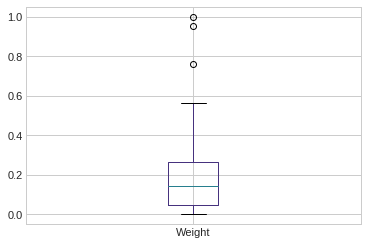

In [82]:
df_edges_semantic_labels_mean_kappa[["Weight"]].boxplot()

In [83]:
round(df_edges_semantic_labels_mean_kappa["Weight"].median(),2)

0.14

In [84]:
round(df_edges_semantic_labels_mean_kappa["Weight"].mean(),2)

0.23

In [85]:
round(df_edges_semantic_labels_mean_kappa["Weight"].std(),2)

0.26

In [86]:
round(df_edges_semantic_labels_mean_kappa["Weight"].quantile(0.25),2)

0.05

In [87]:
round(df_edges_semantic_labels_mean_kappa["Weight"].quantile(0.75),2)

0.27

In [88]:
round(df_edges_semantic_labels_mean_kappa["Weight"].quantile(0.75) - df_edges_semantic_labels_mean_kappa["Weight"].quantile(0.25),2)

0.22

Visualizations of the agreement, using different thresholds

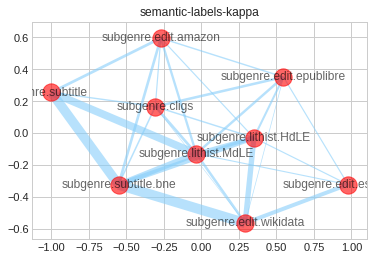

In [89]:
process_labels.make_network(df_edges_semantic_labels_mean_kappa, outdir, "semantic-labels-kappa", multiple_value_edges_by = 10, threshold = 0.05)

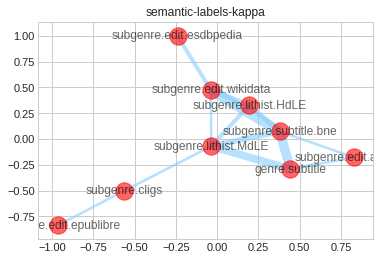

In [90]:
process_labels.make_network(df_edges_semantic_labels_mean_kappa, outdir, "semantic-labels-kappa", multiple_value_edges_by = 10, threshold = 0.25)

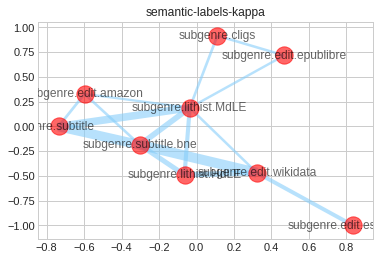

In [91]:
process_labels.make_network(df_edges_semantic_labels_mean_kappa, outdir, "semantic-labels-kappa", multiple_value_edges_by = 10, threshold = 0.23)

Definition of what should be considered as independent sources

In [92]:
independent_sources_genre = ['subgenre.cligs', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', 'subgenre.edit.amazon','subgenre.subtitle.bne']

# 5.1.7. Consistent Labels across Sources

Calculating the agreement for each semantic label

In [93]:
label_agreement_df = process_labels.calculate_agreement_per_label(semantic_labels, palette_semantic_labels, independent_sources_genre, outdir, "semantic", does_filter = True, threshold = 0.00)

almacenamiento
americana
animales


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:373: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


antiguo
antireligiosa
antología
autoayuda
autobiografía
aventura
biblioteca
biografía
borrador
catalán
ciencia-ficción
cinematográfica
ciudad
clásico
completa
consulta
corta
cortesana
costumbrista
crimen
crítica-social
crónica
cuadro
cuento
culta
cómic
de tesis
de-acción
diario
diálogo
drama
educación
empresa
ensayo
episodio nacional
epistolar
epopeya
erótica
escena
español
esperpento
espiritual
estrategia
etopeya
europea
evocación
familia
fantástico
ficción
ficción-política
filosófica
folletín
fábula
greguería
guerra
historia
histórica
humor
híbrido
idiomas
inglés
intriga
irreal
juvenil-infantil
larga
lectura
leyenda
libro de viajes
literatura
marítimo
memorias
modernista
moral
naturalista
nebulosa
nivola
normativa
novela
original
otro
pacifista
periodismo
picaresca
policíaca
política
poética
prosa
psicológica
póstuma
realista
regeneracionista
regionalista
religiosa
romántica
saga
sentencias
sentimental
siglo-xix
simbólica
social
suelta
sátira
taurina
teatro
teoría literaria
terror
va

In [94]:
label_agreement_df = label_agreement_df.reindex_axis(label_agreement_df.mean().sort_values(ascending=False).index, axis=1)

Each pairwise combination of sources is now a row, each semantic label a column

In [95]:
label_agreement_df.shape

(15, 110)

In [96]:
label_agreement_df.head()

,guerra,diálogo,histórica,humor,aventura,nivola,poética,memorias,naturalista,erótica,...,marítimo,intriga,irreal,juvenil-infantil,larga,lectura,leyenda,libro de viajes,literatura,almacenamiento
3,0.191874,0.0,0.253490,0.068474,0.024864,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.129126,0.000000,0.000000,0.0,0.438167,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.243662,0.0,0.023078,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.000000,0.0,0.332919,0.052492,0.042074,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.497191,0.0,0.000000,0.189128,0.000000,0.0,0.495775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Amount of semantic labels that seem to be assigned in an arbitrary manner

In [97]:
random_labels = label_agreement_df.loc[:, (label_agreement_df.sum() == 0)].columns.tolist()
len(random_labels)

78

Propotion of random labels

In [98]:
round(len(random_labels)/label_agreement_df.shape[1],2)*100

71.0

Specific labels

In [99]:
print(*[item  for item in sorted(random_labels)], sep=", ")


almacenamiento, americana, animales, antiguo, antireligiosa, antología, autoayuda, biblioteca, borrador, catalán, ciencia-ficción, cinematográfica, ciudad, clásico, completa, consulta, corta, cortesana, crimen, crítica-social, crónica, cuadro, cuento, culta, cómic, de tesis, de-acción, diario, empresa, ensayo, epistolar, epopeya, escena, español, esperpento, estrategia, etopeya, europea, evocación, familia, ficción, ficción-política, folletín, fábula, híbrido, idiomas, inglés, intriga, irreal, juvenil-infantil, larga, lectura, leyenda, libro de viajes, literatura, marítimo, moral, nebulosa, normativa, novela, original, otro, pacifista, periodismo, picaresca, policíaca, prosa, póstuma, regeneracionista, religiosa, saga, sentencias, siglo-xix, suelta, sátira, teatro, teoría literaria, terror


How many are not random?

In [100]:
non_random_labels = label_agreement_df.loc[:, (label_agreement_df.sum() != 0)].columns.tolist()
len(non_random_labels)

32

Which are the non random labels?

In [101]:
print(non_random_labels)

['guerra', 'diálogo', 'histórica', 'humor', 'aventura', 'nivola', 'poética', 'memorias', 'naturalista', 'erótica', 'greguería', 'fantástico', 'episodio nacional', 'costumbrista', 'social', 'taurina', 'vanguardista', 'espiritual', 'regionalista', 'realista', 'autobiografía', 'psicológica', 'modernista', 'biografía', 'educación', 'romántica', 'simbólica', 'política', 'filosófica', 'drama', 'sentimental', 'historia']


Mean agreement in the complete table

In [102]:
round(np.mean([item for sublist in label_agreement_df.values.tolist() for item in sublist]),2)

0.02

Mean and standard deviation of the agreement between the sources

In [103]:
round(label_agreement_df.mean().mean(),2)

0.02

In [104]:
round(label_agreement_df.std().mean(),2)

0.03

Table summarizing information about the labels

In [107]:
summary_label_agreement_df = process_labels.summary_labels(label_agreement_df, outdir)

In [108]:
summary_label_agreement_df.sort_values(by="number pairs kappa", ascending=False)

,number pairs kappa,mean kappa,median kappa
guerra,10.0,0.363351,0.335627
histórica,10.0,0.230568,0.244153
humor,10.0,0.153767,0.116191
aventura,8.0,0.191693,0.132512
diálogo,6.0,0.413620,0.357765
social,5.0,0.148691,0.084758
realista,5.0,0.053183,0.028270
memorias,4.0,0.279464,0.202416
fantástico,4.0,0.239810,0.235769
naturalista,3.0,0.348406,0.412807


Example from sentimental novel

In [109]:
summary_label_agreement_df.loc["sentimental"]

number pairs kappa    1.000000
mean kappa            0.016212
median kappa          0.016212
Name: sentimental, dtype: float64

Results about the agreement as boxplots 

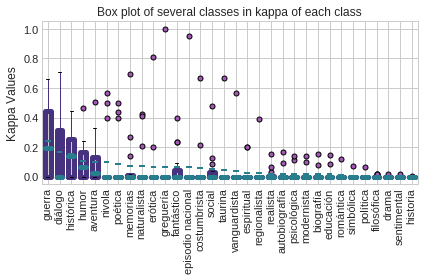

In [110]:
describe_data.simple_boxplot(label_agreement_df, non_random_labels, outdir, "kappa of each class", do_cull = True, ylabel = "Kappa Values", rotation=90)


Accepted classes are the semantic labels that either at least two sources agreeing on, or that its agreement is strong (>0.8)

In [111]:
accepted_classes = summary_label_agreement_df.loc[ (summary_label_agreement_df["number pairs kappa"] > 1) | (summary_label_agreement_df["mean kappa"] > 0.8)].index.tolist()

Amount of accepted classes and specific classes

In [112]:
len(accepted_classes)

23

In [113]:
print(*[item  for item in sorted(accepted_classes)], sep=", ")

autobiografía, aventura, biografía, costumbrista, diálogo, educación, episodio nacional, erótica, espiritual, fantástico, filosófica, greguería, guerra, histórica, humor, memorias, modernista, naturalista, nivola, poética, psicológica, realista, social


Semantic labels that the agreement did not suffice

In [114]:
not_completely_consistent_labels = summary_label_agreement_df.loc[ (summary_label_agreement_df["number pairs kappa"] == 1) & (summary_label_agreement_df["mean kappa"] < 0.8)].index.tolist()
len(not_completely_consistent_labels)

9

In [115]:
print(*[item  for item in sorted(not_completely_consistent_labels)], sep=", ")

drama, historia, política, regionalista, romántica, sentimental, simbólica, taurina, vanguardista


In [126]:
ignored_classes = random_labels + not_completely_consistent_labels 

# 5.1.8. Discussion and Proposal of Subgenre Palette

Proportion of the accepted classes for the corpus

In [127]:
round(metadata.shape[0] / len(accepted_classes),2)

15.57

Are the accepted classes in Thema?

In [128]:
semantic_classes_not_in_thema = list(set(reference_labels.loc[reference_labels["semantic_label_reference"].isin(accepted_classes) & (reference_labels["thema_code"]=="-")]["semantic_label_reference"]))
len(semantic_classes_not_in_thema)

9

In [129]:
print(*[item  for item in sorted(semantic_classes_not_in_thema)], sep=", ")

costumbrista, diálogo, episodio nacional, greguería, modernista, naturalista, nivola, psicológica, realista


In [130]:
semantic_classes_in_thema =  list(set(reference_labels.loc[reference_labels["semantic_label_reference"].isin(accepted_classes) & (reference_labels["thema_code"]!="-")]["semantic_label_reference"]))
len(semantic_classes_in_thema)

14

In [131]:
print(*[item  for item in sorted(semantic_classes_in_thema)], sep=", ")

autobiografía, aventura, biografía, educación, erótica, espiritual, fantástico, filosófica, guerra, histórica, humor, memorias, poética, social


Proportion of the standardized classes

In [132]:
round(len(semantic_classes_in_thema)/len(accepted_classes),2)*100

61.0

In [133]:
len(palette_semantic_labels)

110

In [134]:
semantic_labels_accepted = semantic_labels.copy()
for label in ignored_classes:
    semantic_labels_accepted = process_labels.delete_specific_label(semantic_labels_accepted, label)
        

In [135]:
semantic_labels_accepted

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne
ne0001,"naturalista,social,realista",,,,aventura,,,,
ne0002,"naturalista,social,realista",,,,realista,"histórica,fantástico",,,
ne0003,"naturalista,social,espiritual,realista",,espiritual,,,,,,
ne0004,"social,espiritual,realista",,espiritual,,realista,,,,
ne0005,"naturalista,realista,social,espiritual,educación",,espiritual,,realista,,,realista,
ne0006,"naturalista,realista,social,espiritual,educación",,espiritual,,realista,,,,
ne0007,"naturalista,realista,social,erótica",,naturalista,naturalista,,,,,
ne0008,"realista,social,erótica",,erótica,,,,,,
ne0009,"naturalista,realista,social,educación",,naturalista,realista,,histórica,,,
ne0010,"social,filosófica",,,,,,,,


In [136]:
df_sources_accepted_labels = process_labels.create_df_of_sources(semantic_labels_accepted[independent_sources_genre], outdir)

(6, 6)


In [137]:
df_sources_accepted_labels

,different_labels,labeled_texts,ratio,mean-labels-texts,std-labels-texts,most-common-label
subgenre.subtitle.bne,15,48.0,3.200000,1.062500,0.244623,memorias
subgenre.lithist.HdLE,16,76.0,4.750000,1.000000,0.000000,naturalista
subgenre.edit.amazon,13,68.0,5.230769,1.720588,1.076833,histórica
subgenre.lithist.MdLE,22,160.0,7.272727,1.000000,0.000000,naturalista
subgenre.edit.epublibre,9,137.0,15.222222,1.240876,0.575550,realista
subgenre.cligs,19,350.0,18.421053,2.825714,1.251210,realista


In [138]:
df_sources_accepted_labels[["different_labels","labeled_texts","ratio","most-common-label"]].round(2)

,different_labels,labeled_texts,ratio,most-common-label
subgenre.subtitle.bne,15,48.0,3.20,memorias
subgenre.lithist.HdLE,16,76.0,4.75,naturalista
subgenre.edit.amazon,13,68.0,5.23,histórica
subgenre.lithist.MdLE,22,160.0,7.27,naturalista
subgenre.edit.epublibre,9,137.0,15.22,realista
subgenre.cligs,19,350.0,18.42,realista


In [139]:
df_sources_accepted_labels["ratio"].median()

6.251748251748252

In [140]:
round(sorted(df_sources_accepted_labels["labeled_texts"].values, reverse=True)[0] / metadata.shape[0],2)*100

98.0

In [141]:
metadata_labels_quantified = process_labels.count_labels_from_sources(accepted_classes, semantic_labels, sources_genre, outdir)

subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne gue

subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne gue

subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne guerra
subgenre.cligs guerra
genre.subtitle guerra
subgenre.lithist.MdLE guerra
subgenre.lithist.HdLE guerra
subgenre.edit.epublibre guerra
subgenre.edit.amazon guerra
subgenre.edit.wikidata guerra
subgenre.edit.esdbpedia guerra
subgenre.subtitle.bne gue

subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedi

subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedi

subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE diálogo
subgenre.edit.epublibre diálogo
subgenre.edit.amazon diálogo
subgenre.edit.wikidata diálogo
subgenre.edit.esdbpedia diálogo
subgenre.subtitle.bne diálogo
subgenre.cligs diálogo
genre.subtitle diálogo
subgenre.lithist.MdLE diálogo
subgenre.lithist.HdLE 

subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epubli

subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subg

subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amazon histórica
subgenre.edit.wikidata histórica
subgenre.edit.esdbpedia histórica
subgenre.subtitle.bne histórica
subgenre.cligs histórica
genre.subtitle histórica
subgenre.lithist.MdLE histórica
subgenre.lithist.HdLE histórica
subgenre.edit.epublibre histórica
subgenre.edit.amaz

subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subti

subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subti

subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
subgenre.subtitle.bne humor
subgenre.cligs humor
genre.subtitle humor
subgenre.lithist.MdLE humor
subgenre.lithist.HdLE humor
subgenre.edit.epublibre humor
subgenre.edit.amazon humor
subgenre.edit.wikidata humor
subgenre.edit.esdbpedia humor
su

subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikida

subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
sub

genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edit.esdbpedia aventura
subgenre.subtitle.bne aventura
subgenre.cligs aventura
genre.subtitle aventura
subgenre.lithist.MdLE aventura
subgenre.lithist.HdLE aventura
subgenre.edit.epublibre aventura
subgenre.edit.amazon aventura
subgenre.edit.wikidata aventura
subgenre.edi

subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE niv

subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne niv

subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne nivola
subgenre.cligs nivola
genre.subtitle nivola
subgenre.lithist.MdLE nivola
subgenre.lithist.HdLE nivola
subgenre.edit.epublibre nivola
subgenre.edit.amazon nivola
subgenre.edit.wikidata nivola
subgenre.edit.esdbpedia nivola
subgenre.subtitle.bne niv

subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitl

genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subt

subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublibre poética
subgenre.edit.amazon poética
subgenre.edit.wikidata poética
subgenre.edit.esdbpedia poética
subgenre.subtitle.bne poética
subgenre.cligs poética
genre.subtitle poética
subgenre.lithist.MdLE poética
subgenre.lithist.HdLE poética
subgenre.edit.epublib

genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edi

subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.Md

subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikidata memorias
subgenre.edit.esdbpedia memorias
subgenre.subtitle.bne memorias
subgenre.cligs memorias
genre.subtitle memorias
subgenre.lithist.MdLE memorias
subgenre.lithist.HdLE memorias
subgenre.edit.epublibre memorias
subgenre.edit.amazon memorias
subgenre.edit.wikida

subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE na

subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE na

subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre.subtitle.bne naturalista
subgenre.cligs naturalista
genre.subtitle naturalista
subgenre.lithist.MdLE naturalista
subgenre.lithist.HdLE naturalista
subgenre.edit.epublibre naturalista
subgenre.edit.amazon naturalista
subgenre.edit.wikidata naturalista
subgenre.edit.esdbpedia naturalista
subgenre

subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedi

subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedi

subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgen

subgenre.cligs erótica
genre.subtitle erótica
subgenre.lithist.MdLE erótica
subgenre.lithist.HdLE erótica
subgenre.edit.epublibre erótica
subgenre.edit.amazon erótica
subgenre.edit.wikidata erótica
subgenre.edit.esdbpedia erótica
subgenre.subtitle.bne erótica
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subge

subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.H

subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amaz

subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
subgenre.subtitle.bne greguería
subgenre.cligs greguería
genre.subtitle greguería
subgenre.lithist.MdLE greguería
subgenre.lithist.HdLE greguería
subgenre.edit.epublibre greguería
subgenre.edit.amazon greguería
subgenre.edit.wikidata greguería
subgenre.edit.esdbpedia greguería
su

subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgen

subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgen

subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
subgenre.subtitle.bne fantástico
subgenre.cligs fantástico
genre.subtitle fantástico
subgenre.lithist.MdLE fantástico
subgenre.lithist.HdLE fantástico
subgenre.edit.epublibre fantástico
subgenre.edit.amazon fantástico
subgenre.edit.wikidata fantástico
subgenre.edit.esdbpedia fantástico
sub

subgenre.subtitle.bne episodio nacional
subgenre.cligs episodio nacional
genre.subtitle episodio nacional
subgenre.lithist.MdLE episodio nacional
subgenre.lithist.HdLE episodio nacional
subgenre.edit.epublibre episodio nacional
subgenre.edit.amazon episodio nacional
subgenre.edit.wikidata episodio nacional
subgenre.edit.esdbpedia episodio nacional
subgenre.subtitle.bne episodio nacional
subgenre.cligs episodio nacional
genre.subtitle episodio nacional
subgenre.lithist.MdLE episodio nacional
subgenre.lithist.HdLE episodio nacional
subgenre.edit.epublibre episodio nacional
subgenre.edit.amazon episodio nacional
subgenre.edit.wikidata episodio nacional
subgenre.edit.esdbpedia episodio nacional
subgenre.subtitle.bne episodio nacional
subgenre.cligs episodio nacional
genre.subtitle episodio nacional
subgenre.lithist.MdLE episodio nacional
subgenre.lithist.HdLE episodio nacional
subgenre.edit.epublibre episodio nacional
subgenre.edit.amazon episodio nacional
subgenre.edit.wikidata episodio n

subgenre.subtitle.bne episodio nacional
subgenre.cligs episodio nacional
genre.subtitle episodio nacional
subgenre.lithist.MdLE episodio nacional
subgenre.lithist.HdLE episodio nacional
subgenre.edit.epublibre episodio nacional
subgenre.edit.amazon episodio nacional
subgenre.edit.wikidata episodio nacional
subgenre.edit.esdbpedia episodio nacional
subgenre.subtitle.bne episodio nacional
subgenre.cligs episodio nacional
genre.subtitle episodio nacional
subgenre.lithist.MdLE episodio nacional
subgenre.lithist.HdLE episodio nacional
subgenre.edit.epublibre episodio nacional
subgenre.edit.amazon episodio nacional
subgenre.edit.wikidata episodio nacional
subgenre.edit.esdbpedia episodio nacional
subgenre.subtitle.bne episodio nacional
subgenre.cligs episodio nacional
genre.subtitle episodio nacional
subgenre.lithist.MdLE episodio nacional
subgenre.lithist.HdLE episodio nacional
subgenre.edit.epublibre episodio nacional
subgenre.edit.amazon episodio nacional
subgenre.edit.wikidata episodio n

subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumb

subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumb

subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumb

subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.wikidata costumbrista
subgenre.edit.esdbpedia costumbrista
subgenre.subtitle.bne costumbrista
subgenre.cligs costumbrista
genre.subtitle costumbrista
subgenre.lithist.MdLE costumbrista
subgenre.lithist.HdLE costumbrista
subgenre.edit.epublibre costumbrista
subgenre.edit.amazon costumbrista
subgenre.edit.

subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne soc

subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre soc

subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon social
subgenre.edit.wikidata social
subgenre.edit.esdbpedia social
subgenre.subtitle.bne social
subgenre.cligs social
genre.subtitle social
subgenre.lithist.MdLE social
subgenre.lithist.HdLE social
subgenre.edit.epublibre social
subgenre.edit.amazon soc

subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subge

subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublib

subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublibre espiritual
subgenre.edit.amazon espiritual
subgenre.edit.wikidata espiritual
subgenre.edit.esdbpedia espiritual
subgenre.subtitle.bne espiritual
subgenre.cligs espiritual
genre.subtitle espiritual
subgenre.lithist.MdLE espiritual
subgenre.lithist.HdLE espiritual
subgenre.edit.epublib

subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subt

genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edi

subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazon realista
subgenre.edit.wikidata realista
subgenre.edit.esdbpedia realista
subgenre.subtitle.bne realista
subgenre.cligs realista
genre.subtitle realista
subgenre.lithist.MdLE realista
subgenre.lithist.HdLE realista
subgenre.edit.epublibre realista
subgenre.edit.amazo

subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata 

subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía


subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata autobiografía
subgenre.edit.esdbpedia autobiografía
subgenre.subtitle.bne autobiografía
subgenre.cligs autobiografía
genre.subtitle autobiografía
subgenre.lithist.MdLE autobiografía
subgenre.lithist.HdLE autobiografía
subgenre.edit.epublibre autobiografía
subgenre.edit.amazon autobiografía
subgenre.edit.wikidata 

genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epu

subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.

subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre.subtitle.bne psicológica
subgenre.cligs psicológica
genre.subtitle psicológica
subgenre.lithist.MdLE psicológica
subgenre.lithist.HdLE psicológica
subgenre.edit.epublibre psicológica
subgenre.edit.amazon psicológica
subgenre.edit.wikidata psicológica
subgenre.edit.esdbpedia psicológica
subgenre

subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgen

subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublib

subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
subgenre.subtitle.bne modernista
subgenre.cligs modernista
genre.subtitle modernista
subgenre.lithist.MdLE modernista
subgenre.lithist.HdLE modernista
subgenre.edit.epublibre modernista
subgenre.edit.amazon modernista
subgenre.edit.wikidata modernista
subgenre.edit.esdbpedia modernista
sub

subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amaz

subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
su

subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amazon biografía
subgenre.edit.wikidata biografía
subgenre.edit.esdbpedia biografía
subgenre.subtitle.bne biografía
subgenre.cligs biografía
genre.subtitle biografía
subgenre.lithist.MdLE biografía
subgenre.lithist.HdLE biografía
subgenre.edit.epublibre biografía
subgenre.edit.amaz

subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
su

subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subg

subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.MdLE educación
subgenre.lithist.HdLE educación
subgenre.edit.epublibre educación
subgenre.edit.amazon educación
subgenre.edit.wikidata educación
subgenre.edit.esdbpedia educación
subgenre.subtitle.bne educación
subgenre.cligs educación
genre.subtitle educación
subgenre.lithist.

subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgen

subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subge

subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublibre filosófica
subgenre.edit.amazon filosófica
subgenre.edit.wikidata filosófica
subgenre.edit.esdbpedia filosófica
subgenre.subtitle.bne filosófica
subgenre.cligs filosófica
genre.subtitle filosófica
subgenre.lithist.MdLE filosófica
subgenre.lithist.HdLE filosófica
subgenre.edit.epublib

In [149]:
metadata_labels_quantified.head()

,guerra,diálogo,histórica,humor,aventura,nivola,poética,memorias,naturalista,erótica,...,costumbrista,social,espiritual,realista,autobiografía,psicológica,modernista,biografía,educación,filosófica
ne0001,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
ne0002,0,0,1,0,0,0,0,0,1,0,...,0,1,0,2,0,0,0,0,0,0
ne0003,0,0,0,0,0,0,0,0,1,0,...,0,1,2,1,0,0,0,0,0,0
ne0004,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,0,0,0,0,0,0
ne0005,0,0,0,0,0,0,0,0,1,0,...,0,1,2,3,0,0,0,0,1,0


In [150]:
texts_without_subgenre = metadata_labels_quantified.loc[metadata_labels_quantified.sum(axis=1) ==0].index.tolist()
texts_without_subgenre

['ne0120', 'ne0136', 'ne0355', 'ne0358']

In [151]:
metadata

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne
ne0001,"naturalist,sentimental,social,realist",,,,"Aventuras, Drama",Ficción contemporánea; Ficción clásica; Litera...,,,
ne0002,"naturalist,social,realist",,novela de tesis,,Realista,"Ficción clásica, Bibliotecas, Libros escolares...",,,
ne0003,"naturalist,social,spiritual,realist",,novela espiritualista,,Drama,"Ficción, Europea, Antologías; Ficción clásica;...",,,
ne0004,"sentimental,social,spiritual,realist",,novela espiritual,,"Drama, Realista","Siglo XIX, Antigua y clásica; Ficción clásica;...",,,
ne0005,"naturalist,realist,sentimental,social,spiritua...",,novela espiritual,,Realista,"Ficción clásica, Ficción contemporánea; Ficció...",,realismo,
ne0006,"naturalist,realist,sentimental,social,spiritua...",,novela espiritual,,Realista,"Ficción clásica; Europea, Antologías",,,
ne0007,"naturalist,realist,social,erotic",,novela naturalista,novela naturalista,Drama,"Ficción clásica ; Europea, Teatro ; Romántica,...",,,
ne0008,"realist,social,erotic",,novela erótica,,,Ficción clásica;,,,novela original
ne0009,"naturalist,realist,sentimental,social,bildungs...",,novela naturalista,novela realista,Drama,"Ficción clásica; Ficción clásica, Ficción hist...",,,
ne0010,"social,philosophical",,,,,Historia;,,,


In [155]:
metadata.loc[texts_without_subgenre][["author.name","title.main"]]

,author.name,title.main
ne0120,RdCastro,El primer loco
ne0136,Azorin,Doña Inés
ne0355,Serna,El chalet de las rosas
ne0358,Serna,La mujer de ámbar


In [157]:
metadata = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/", metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",").fillna("")
metadata.shape

metadata and class shape: 	 (358, 173)


(358, 173)

In [158]:
metadata.loc[metadata_labels_quantified.loc[metadata_labels_quantified.sum(axis=1) >=11].index.tolist()][["author.name","title.main"]]

,author.name,title.main
ne0112,Baroja,El aprendiz de conspirador
ne0116,Baroja,Camino de perfección
ne0118,Baroja,Los caudillos de 1830
ne0217,AMachado,De un cancionero apócrifo
ne0243,Baroja,El escuadrón del Brigante
ne0247,Baroja,Crónica escandalosa


In [159]:
metadata_subgenres = pd.merge(metadata,metadata_labels_quantified, left_index=True, right_index=True)

In [160]:
metadata_subgenres.to_csv(outdir+"metadata_quantified-subgenres.csv",sep="\t")

In [165]:
from shutil import copyfile
copyfile(outdir+"metadata_quantified-subgenres.csv","/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_quantified-subgenres.csv")

'/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_quantified-subgenres.csv'